# Module 5: Pickle

### Introduction
There are many different file types used in the data world. Main examples are .csv, .json and .xml, which are are easy to read and/or write, and are used extensively in multiple programming languages. However, sometimes you want to save a Python data object directly, such as a dictionary, list, tuple or even a fully trained machine learning algorithms created in Python. This is where the *pickle* module comes in.

This module will give you an in-depth look on how to best use the *pickle* module to save and load Python data objects. The outline is:
1. Pickle files basics
2. The Python *pickle* module 
3. speed comparison of pickle files and other ways of saving data objects
4. saving and loading fully trained machine learning algorithm 

Enjoy!

In [66]:
# Import all the packages needed for section 1 to 3
import os
import pickle
import numpy as np
import pandas as pd

# Section 1: Pickle files

Pickle is a very useful Python library. Pickle can be used to serialize Python object structures. Any object in Python can be pickled so that it can be saved on disk. So it's very specific to Python. This process of serializing Python object structures refers to the process of converting an object in the memory to a byte stream that can be stored as a binary file on disk. When we load it back to a Python program, this binary file can be de-serialized back to a Python object.

Besides the fact that we can store Python objects, there is another advantage; its speed. Later in the module we'll focus a bit more on the speed of pickle, but let's look at an example below to get an idea.

First, we'll have to create an object that we can store. Then, we'll look at the speed differences between Pandas and Pickle in storing this object.

In [67]:
# Create a Pandas DataFrame to store.

np.random.seed = 0
df_size = 1_000_000

df = pd.DataFrame(
    {
        "a": np.random.rand(df_size),
        "b": np.random.rand(df_size),
        "c": np.random.rand(df_size),
        "d": np.random.rand(df_size),
        "e": np.random.rand(df_size),
    }
)

display(df)

,a,b,c,d,e
0,0.183625,0.348848,0.863775,0.917657,0.990720
1,0.044106,0.616701,0.550718,0.109170,0.270644
2,0.525869,0.131100,0.335064,0.923619,0.722241
3,0.747618,0.641865,0.287803,0.986234,0.569400
4,0.982702,0.032138,0.158734,0.104377,0.961294
...,...,...,...,...,...
999995,0.000887,0.739736,0.795252,0.922214,0.502814
999996,0.386396,0.389527,0.740303,0.376377,0.149814
999997,0.048683,0.175512,0.699228,0.807545,0.733259
999998,0.293129,0.901479,0.966576,0.405103,0.033062


Let's store the Pandas DataFrame as a .csv file using the pandas library.

In [68]:
%%time

# Save the Pandas DataFrame as a .csv file.
df.to_csv('data.csv', index=False)

CPU times: total: 5.56 s
Wall time: 5.56 s


Let's store the Pandas DataFrame as a pickle file using the pickle library.

In [69]:
%%time

# Save the Pandas DataFrame as a pickle file.
with open('dataframe.pickle', mode='wb') as file:
    pickle.dump(df, file) 

CPU times: total: 46.9 ms
Wall time: 61 ms


When you look at the time differences, there should be quite a difference. Pickle objects are very much faster to work with. Now that we have seen an example, we can take a look at the pickle library.

In the folder you are currently working in, there are some pickled files saved already. Pickled files are saved as a binary file. Let's print all the files that are in the current folder to see them.

##### ASSIGNMENT 1: print all pickle files in the directory of the notebook
*Hint: use the skills learned in the file-system operations module*

In [70]:
import pathlib

# Clean up dataframe.pickle because it's huge
try:
    os.remove("dataframe.pickle")
except OSError:
    pass

list_of_pickle_files = []

for file in pathlib.Path("./").glob("*.pickle"):
    list_of_pickle_files.append(file.name)


print(list_of_pickle_files)

['pickled_list.pickle', 'pickle_file_1.pickle', 'pickle_file_2.pickle', 'pickle_file_3.pickle']


### **Theory: which file extensions are used for pickle file?**
There are three pickle files found. They can be easily recognized by their *.pickle* extension. However, this is not the only used extension for pickle files. 

For instance, in the [Python 2 documentation](https://docs.python.org/2/library/pickle.html#example) *.pkl* is used as an extension.
Other examples online might include *.p* as an extension

##### ASSIGNMENT 2: print the contents of the pickle files with .read(). Also use the 'open' method.

In [71]:
for pickle_file in list_of_pickle_files:
    with open(pickle_file, "rb") as file:
        print(file.read())

b'\x80\x04\x95\x1e\x00\x00\x00\x00\x00\x00\x00]\x94(\x8c\x02hi\x94\x8c\x01I\x94\x8c\x02am\x94\x8c\x01a\x94\x8c\x04list\x94e.'
b"\x80\x04\x95r\x00\x00\x00\x00\x00\x00\x00}\x94(\x8c\nArchimedes\x94G@\t\x1e\xb8Q\xeb\x85\x1f\x8c\x0fEuler's number \x94G?\xfb\\(\xf5\xc2\x8f\\\x8c\nPythagoras\x94G?\xf6\x8f\\(\xf5\xc2\x8f\x8c\tTheodorus\x94G?\xfb\xae\x14z\xe1G\xae\x8c\x05Apery\x94G?\xf3333333u."
b'\x80\x04\x95\xd0\x00\x00\x00\x00\x00\x00\x00\x8c\x15numpy.core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01K\t\x85\x94h\x03\x8c\x05dtype\x94\x93\x94\x8c\x02i8\x94\x89\x88\x87\x94R\x94(K\x03\x8c\x01<\x94NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00t\x94b\x89CH\x02\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00\x0b\x00\x00\x00\x00\x00\x00\x00\r\x00\x00\x00\x00\x00\x00\x00\x11\x00\x00\x00\x00\x00\x00\x00\x13\x00\x00\x00\x00\x00\x00\x00\x17\x00\

Most likely, you cannot make any sense of the file contents. This is because pickle files are Python Objects that are serialized into a byte stream. The printed content shows the actual bytes.

When you are unsure with what kind of data object you are working with, it is often a good choice to check the data type with 'type()'. 

##### ASSIGNMENT 3: print the file type of each pickled file with type() 

In [72]:
for file in list_of_pickle_files:
    with open(file, mode="rb") as pickle_file:
        print(f"The object type of contents of {file} are: {type(pickle_file.read())}")

The object type of contents of pickled_list.pickle are: <class 'bytes'>
The object type of contents of pickle_file_1.pickle are: <class 'bytes'>
The object type of contents of pickle_file_2.pickle are: <class 'bytes'>
The object type of contents of pickle_file_3.pickle are: <class 'bytes'>


### **Theory - why use pickle?**
Compared to other file types, it might be unclear at this point why we want to use pickle at all. Binary files aren't easy to read or use in general. So wouldn't it be more convenient to save data as a more generic file types such as XML, JSON or CSV?

The answer is: it depends on what type of information you want to save and/or transfer. Pickle is meant as a convenient file type to transfer **Python objects** specifically between different systems, environments or pieces of Python code. It is the fastest and most efficient way to transport practically any(!) Python object.

# Section 2: The Python *pickle* module
The *pickle* module is part of the standard library that comes with Python. As mentioned earlier, it is used to easily serialize and deserialize Python objects. Let's take a look at the most important methods the module has to offer!

For more information, please refer to the [official pickle documentation](https://docs.python.org/3/library/pickle.html)

Let's explore the functionality in code!

In [73]:
import pickle

##### ASSIGNMENT 4: create a Python object and save it as a pickle file with the dump() method.

In [74]:
my_list = ["hi", "I", "am", "a", "list"]

with open("pickled_list.pickle", mode="wb") as file:
    pickle.dump(my_list, file)  # save it as a pickle file

##### ASSIGNMENT 5:  open the object you just created with load() method.

In [75]:
with open("pickled_list.pickle", "rb") as file:
    my_list = pickle.load(file)

print(my_list)

['hi', 'I', 'am', 'a', 'list']


##### ASSIGNMENT 6: load the pickle files that were already present in the folder and determine what kind of Python objects they are

In [76]:
for pickle_file in pathlib.Path("./").glob("pickle_file*.pickle"):
    with open(pickle_file, "rb") as file:
        print(f"{file.name} is of type {type(pickle.load(file))}")

pickle_file_1.pickle is of type <class 'dict'>
pickle_file_2.pickle is of type <class 'numpy.ndarray'>
pickle_file_3.pickle is of type <class 'list'>


# Section 3: speed comparison

### **Theory - speed and file size of pickle files**
As a Data Engineer, you often want the most efficient solution to the challenges that appear during your work. When working with small datasets, different approaches might seem interchangeable. However, working with larger datasets, you will notice differences in the runtime speed of code.

In this section, we will explore how fast writing and reading pickle files are when working with tabular data compared to using .csv files. The pandas libary will be used to create a large dummy dataset, save it to disk and load it again. Since the focus of this module is Pickle, there will not be in-depth info of pandas, but it is always possible to check out the [Pandas Documentation](https://pandas.pydata.org/docs/). 

Furthermore, we will use a builtin magic function of jupyter called *%%time* that will show the time it took to run a certain cell. 




##### ASSIGNMENT 7: create a dummy dataset of 5 columns and 2 million rows

In [77]:
np.random.seed = 42
df_size = 5_000_000

df = pd.DataFrame(
    {
        "a": np.random.rand(df_size),
        "b": np.random.rand(df_size),
        "c": np.random.rand(df_size),
        "d": np.random.rand(df_size),
        "e": np.random.rand(df_size),
    }
)

display(df)

,a,b,c,d,e
0,0.667342,0.327362,0.154388,0.709048,0.858058
1,0.264845,0.229500,0.139747,0.575584,0.900879
2,0.883040,0.158856,0.215750,0.833296,0.079341
3,0.297594,0.840379,0.356759,0.454422,0.892625
4,0.615980,0.170092,0.316916,0.720198,0.467245
...,...,...,...,...,...
4999995,0.108792,0.252188,0.648315,0.851313,0.059330
4999996,0.692337,0.504242,0.857948,0.071834,0.709426
4999997,0.753316,0.494880,0.245570,0.926594,0.366622
4999998,0.956626,0.332744,0.159280,0.566957,0.645245


##### ASSIGNMENT 8: save the DataFrame as a .csv file using the .to_csv() function of Pandas

In [ ]:
%%time

df.to_csv("dataframe.csv", index=False)

##### ASSIGNMENT 9: load the created .csv file as a DataFrame using the pandas.read_csv() funcion of Pandas

In [ ]:
%%time

df = pd.read_csv('dataframe.csv')
df

CPU times: total: 3.14 s
Wall time: 3.15 s


,a,b,c,d,e
0,0.523465,0.496676,0.980839,0.114085,0.107245
1,0.671210,0.457585,0.678764,0.906818,0.034605
2,0.265635,0.233298,0.511041,0.638844,0.203795
3,0.147094,0.342668,0.192026,0.359634,0.388442
4,0.661628,0.880798,0.320226,0.160003,0.441920
...,...,...,...,...,...
4999995,0.152853,0.843943,0.317476,0.595721,0.264844
4999996,0.747448,0.109185,0.350660,0.685929,0.772137
4999997,0.650469,0.417687,0.483428,0.263017,0.705837
4999998,0.854382,0.887317,0.087619,0.242261,0.700818


##### ASSIGNMENT 10: now save the original DataFrame we created as a pickle file

In [ ]:
%%time

with open('dataframe.pickle', 'wb') as file:
    pickle.dump(df, file)


CPU times: total: 141 ms
Wall time: 390 ms


In [ ]:
%%time

# Or...

df.to_pickle('dataframe.pickle')

CPU times: total: 78.1 ms
Wall time: 376 ms


##### ASSIGNMENT 11: now deserialize pickle file containing the serialized DataFrame into a DataFrame 

In [ ]:
%%time

with open('dataframe.pickle', 'rb') as file:
    df = pickle.load(file)
    
display(df)

,a,b,c,d,e
0,0.523465,0.496676,0.980839,0.114085,0.107245
1,0.671210,0.457585,0.678764,0.906818,0.034605
2,0.265635,0.233298,0.511041,0.638844,0.203795
3,0.147094,0.342668,0.192026,0.359634,0.388442
4,0.661628,0.880798,0.320226,0.160003,0.441920
...,...,...,...,...,...
4999995,0.152853,0.843943,0.317476,0.595721,0.264844
4999996,0.747448,0.109185,0.350660,0.685929,0.772137
4999997,0.650469,0.417687,0.483428,0.263017,0.705837
4999998,0.854382,0.887317,0.087619,0.242261,0.700818


CPU times: total: 93.8 ms
Wall time: 98.5 ms


##### ASSIGNMENT 12: Now print the file size of both the csv file and the pickle file you created.

*Hint: the OS library has something for this called getsize()*

In [ ]:
print(
    os.path.getsize("dataframe.csv") / 1000000,
    "MB vs.",
    os.path.getsize("dataframe.pickle") / 1000000,
    "MB",
)

486.749503 MB vs. 200.000719 MB


### **Theory - speed and file size of pickle files**
As you can see Pickle is way more efficient to use as a temporary storage than .csv when it comes to tabular data.
* it is much faster to read/write pickle files than csv files
* the file size is also smaller for pickle files compared to csv files

However, there are also downsides. Pickle creates files unreadable for humans, and cannot be loaded into programs like Excel. Therefore, always make sure if pickle is the right fit for the job!

# Section 4: pickle and machine learning algorithms
In this final section, we are going to save a fully trained machine learning model into a pickle file. As already stated, almost all Python objects can be stored as pickle, and this includes ML models. This is arguably the most powerful usage of Pickle for a Data Engineer when working with ML models.

Since the focus of this Module is not on the creation or training of a ML model, a cell with all code required to do this is given below. Simply run the cell to load the correct data and train a model.

The data we use is from the famous [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris), which is often used to showcase classification algorithms.

In [ ]:
# Extra libraries needed for this section
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

##### ASSIGNMENT 13: run the following few cells to load and explore the data, and subsequently train a model.

In [ ]:
# load data from sklearn
iris = datasets.load_iris()

# turn data into DataFrame
df_iris = pd.DataFrame(
    data=np.c_[iris["data"], iris["target"]], columns=iris["feature_names"] + ["target"]
)

# Add species column
df_iris["species"] = df_iris["target"].map(
    {0: "setosa", 1: "versicolor", 2: "virginica"}
)

# Show top rows of DataFrame
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


Text(0.5, 1.0, 'Iris petals (color indicates class)')

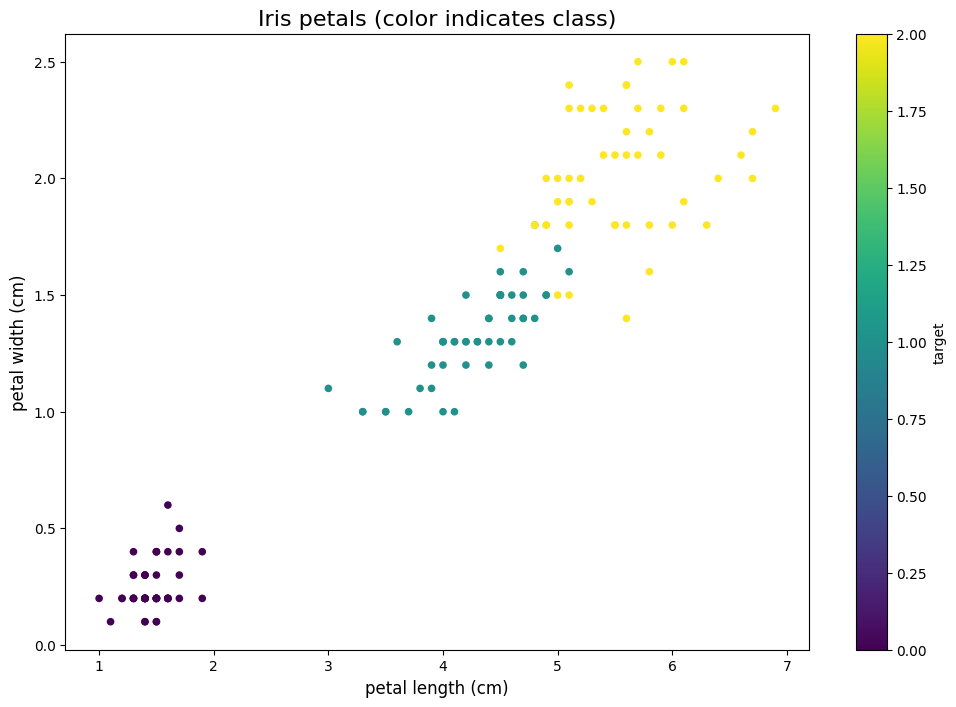

In [ ]:
# Plot the petal length and petal width
df_iris.plot.scatter(
    x="petal length (cm)",
    y="petal width (cm)",
    c="target",
    colormap="viridis",
    figsize=(12, 8),
)

plt.xlabel("petal length (cm)", size=12)
plt.ylabel("petal width (cm)", size=12)
plt.title("Iris petals (color indicates class)", size=16)

In [ ]:
# PARAMETERS TO CHANGE
input_columns = ["petal length (cm)", "petal width (cm)"]
test_size = 0.5
random_state = 42
model = LogisticRegression()
model_name = "LR_with_petaldata"

# Create input X, and target y to train the model with
X = df_iris[input_columns]  # only use petal length and width
X = X.to_numpy()  # converting into numpy array
y = iris["target"]

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

# Fit the model based on chosen parameters
model.fit(X, y)

LogisticRegression()

##### ASSIGNMENT 14: save the fitted model as a pickle file

In [ ]:
#### ADD YOUR CODE HERE ####
path_to_savefile = model_name + ".pickle"

with open(path_to_savefile, mode="wb") as file:
    pickle.dump(model, file)  # save it as a pickle file

##### ASSIGNMENT 15: load the fitted model and print metrics

In [ ]:
#### ADD YOUR CODE HERE ####
path_to_model = "LR_with_petaldata.pickle"
with open(path_to_model, mode="rb") as file:
    loaded_model = pickle.load(file)  # save it as a pickle file

training_prediction = loaded_model.predict(X_train)
test_prediction = loaded_model.predict(X_test)
#### STOP ADDING YOUR CODE HERE ####


# Precision Recall scores
print("Precision, Recall, Confusion matrix, in training\n")
print(metrics.classification_report(y_train, training_prediction, digits=3))

# Confusion matrix
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, training_prediction))

AttributeError: 'NoneType' object has no attribute 'predict'

##### (OPTIONAL) ASSIGNMENT 16
* fit another Logistic Regression model with diffent input columns (sepal data instead of petal)
* save the model under a different name
* load both models and compare metrics 

*Hint: doublecheck you are using the right X_train and X_test for each model when predicting*

Which model performs better?

In [ ]:
# PARAMETERS TO CHANGE
input_columns = ["sepal length (cm)", "sepal width (cm)"]
test_size = 0.5
random_state = 42
model = LogisticRegression()
model_name = "LR_with_sepaldata"


# Create input X, and target y to train the model with
X = df_iris[input_columns]  # only use petal length and width
X = X.to_numpy()  # converting into numpy array
y = iris["target"]

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

# Fit the model based on chosen parameters
model.fit(X, y)


training_prediction = model.predict(X_train)

test_prediction = model.predict(X_test)

print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(y_train, training_prediction, digits=3))

# Confusion matrix
print("Confuson matrix")
print(metrics.confusion_matrix(y_train, training_prediction))

## **THEORY - Pickle for Machine Learning models**
As you can see, saving different models as different pickle files is done easily. This can be of great help to a Data Engineer working with ML models.

 For example, it makes model comparison all trained with different parameters more organized and efficient. 
 
 Furthermore, it can help productionalize models: train multiple models and compare them in a development environment and only transfer the pickle file of the best performing model to the production environment.

Congratulations on completing this module!